In [1]:
# libraries
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# tensorflow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2022-04-27 18:59:40.204814: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-27 18:59:40.204839: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow version: 2.8.0


In [2]:
# loading the dataset
df = pd.read_csv('../../data/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
# Shape - dataset
print(f"Shape dataset Full:.........observations/rows: {df.shape[0]}")
print(f"Shape dataset Full:...................columns: {df.shape[1]}")

Shape dataset Full:.........observations/rows: 11162
Shape dataset Full:...................columns: 17


In [4]:
# stats about the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
# dataset - info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# Looking for NaN on the dataset.
# counting the number of NaN for each feature.
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# convert object type to category type
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [8]:
# dataset - info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   default    11162 non-null  category
 5   balance    11162 non-null  int64   
 6   housing    11162 non-null  category
 7   loan       11162 non-null  category
 8   contact    11162 non-null  category
 9   day        11162 non-null  int64   
 10  month      11162 non-null  category
 11  duration   11162 non-null  int64   
 12  campaign   11162 non-null  int64   
 13  pdays      11162 non-null  int64   
 14  previous   11162 non-null  int64   
 15  poutcome   11162 non-null  category
 16  deposit    11162 non-null  category
dtypes: category(10), int64(7)
memory usage: 721.5 KB


In [9]:
# column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# list of category features
list_cats = list(df.select_dtypes(include=['category']).columns)
list_nums = list(df.select_dtypes(include=['int64']).columns)

# unique values in cat_cols:
for i in list_cats:
    print(f'{ i.upper() }:{df[i].unique()}')

JOB:['admin.', 'technician', 'services', 'management', 'retired', ..., 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
MARITAL:['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']
EDUCATION:['secondary', 'tertiary', 'primary', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']
DEFAULT:['no', 'yes']
Categories (2, object): ['no', 'yes']
HOUSING:['yes', 'no']
Categories (2, object): ['no', 'yes']
LOAN:['no', 'yes']
Categories (2, object): ['no', 'yes']
CONTACT:['unknown', 'cellular', 'telephone']
Categories (3, object): ['cellular', 'telephone', 'unknown']
MONTH:['may', 'jun', 'jul', 'aug', 'oct', ..., 'jan', 'feb', 'mar', 'apr', 'sep']
Length: 12
Categories (12, object): ['apr', 'aug', 'dec', 'feb', ..., 'may', 'nov', 'oct', 'sep']
POUTCOME:['unknown', '

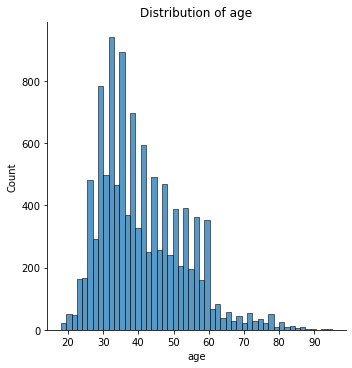

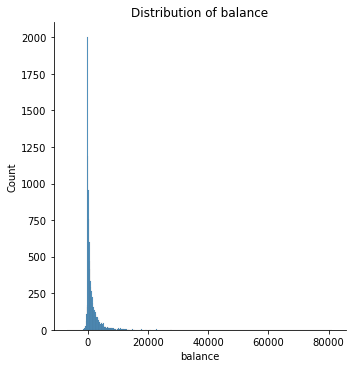

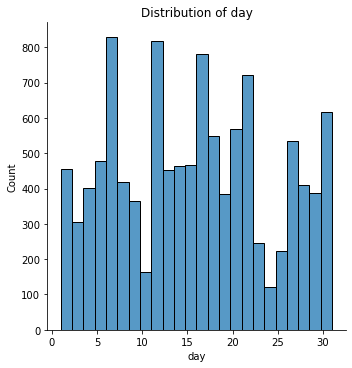

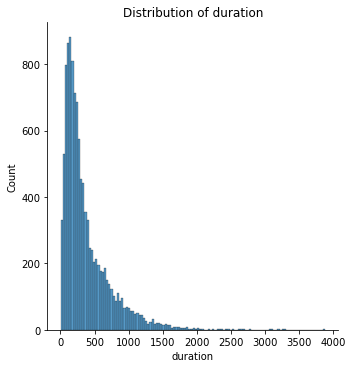

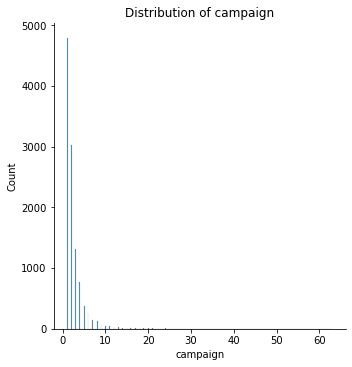

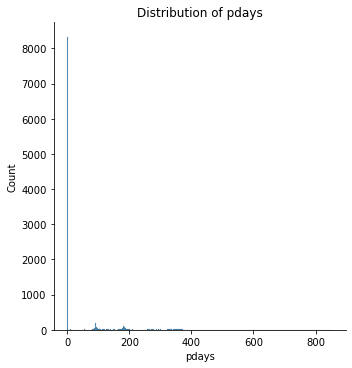

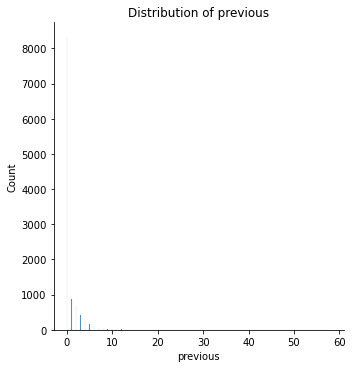

In [24]:
# distribution of continuous variables 

for i in list_nums:
    sns.displot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


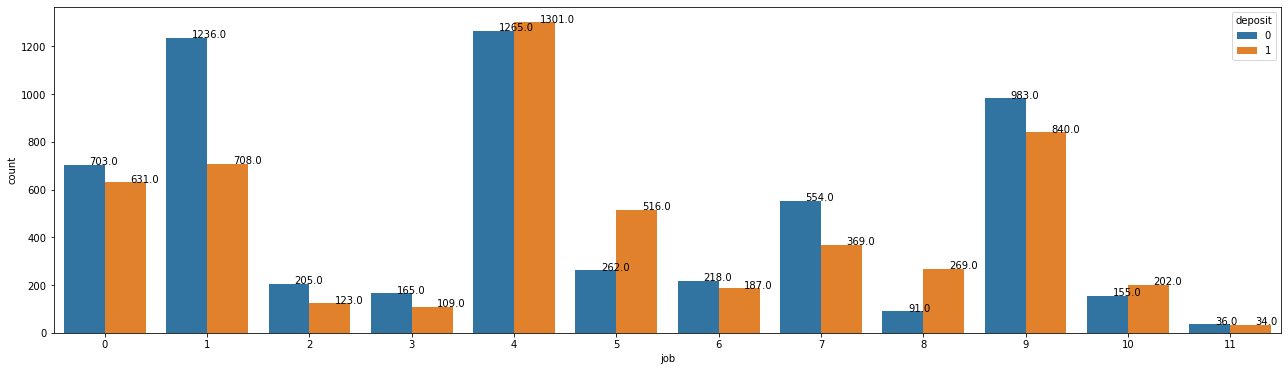

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


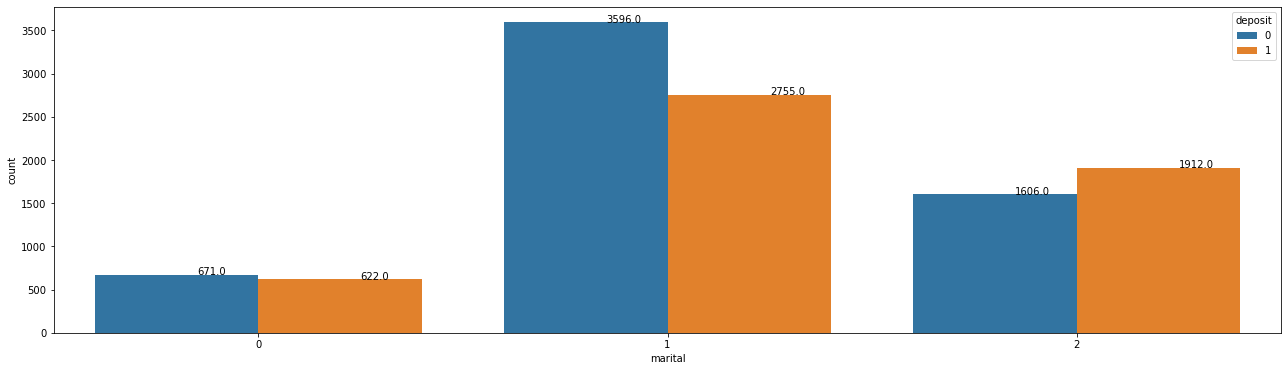

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


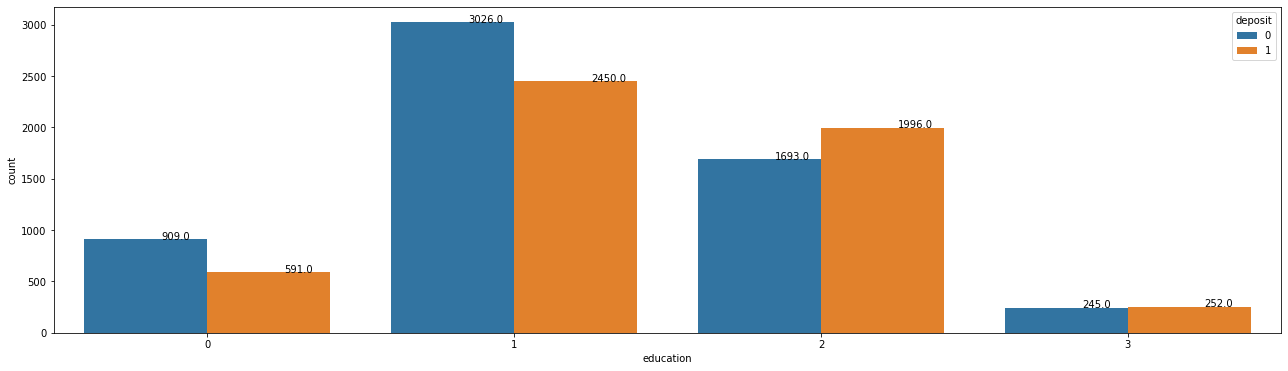

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


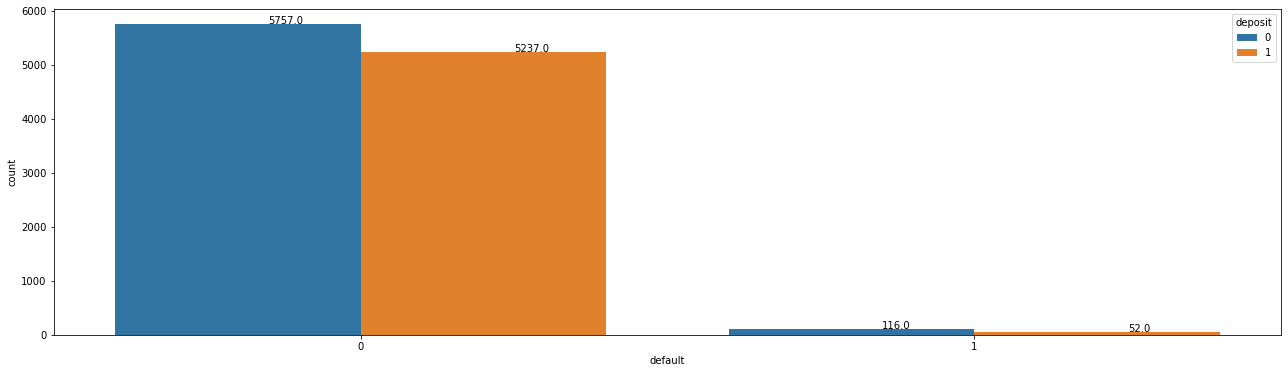

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


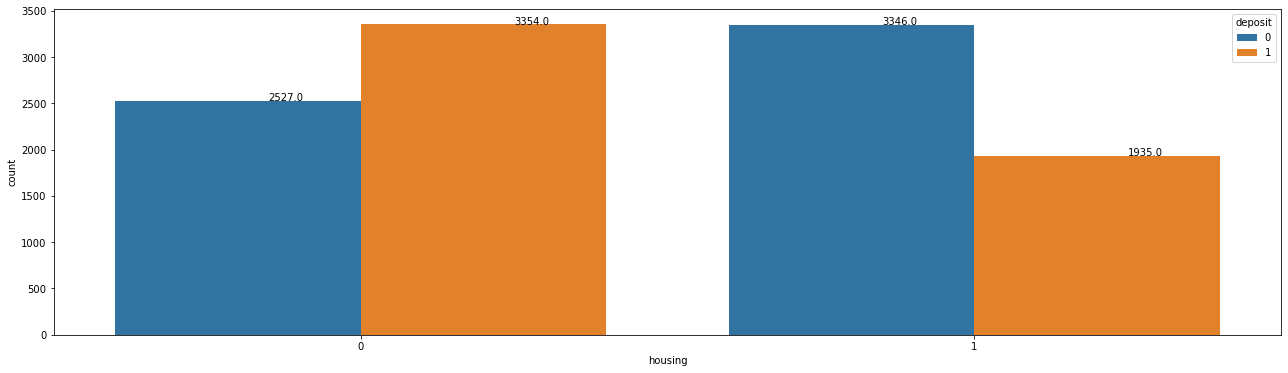

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


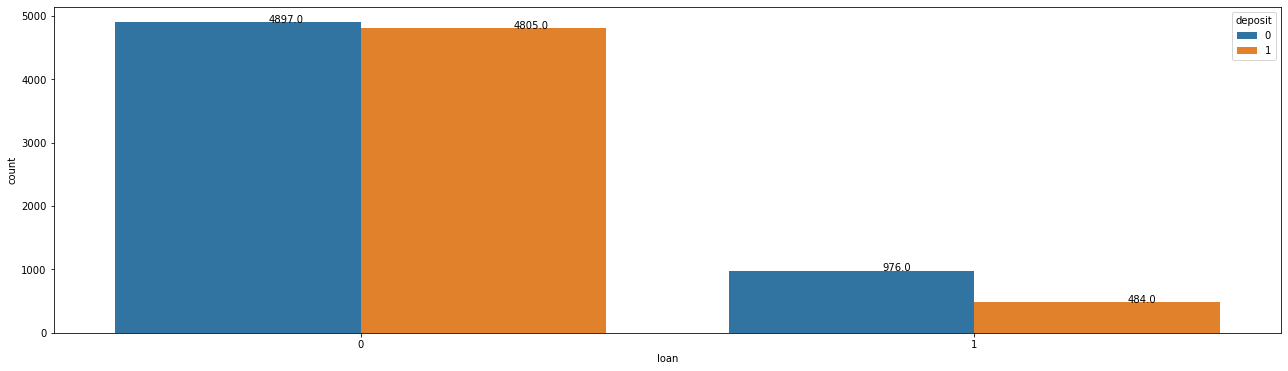

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


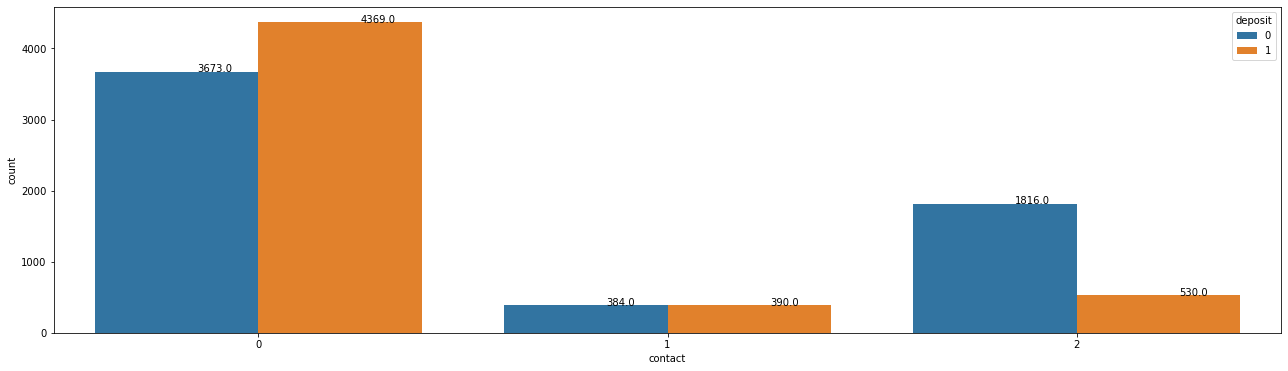

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


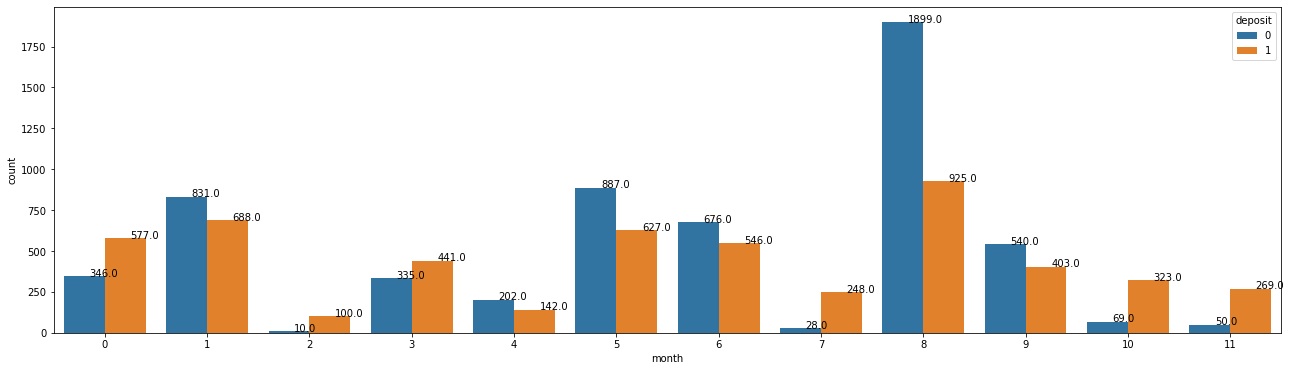

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


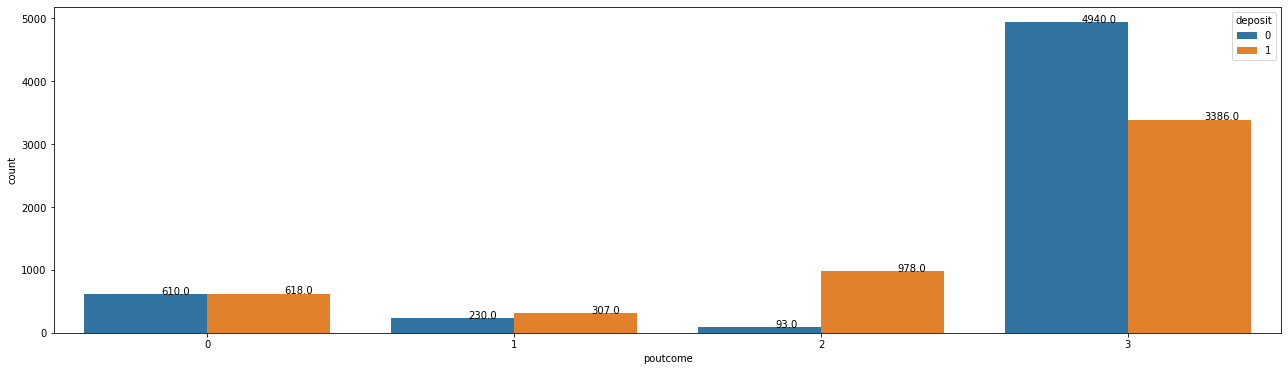

/home/andsilva/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


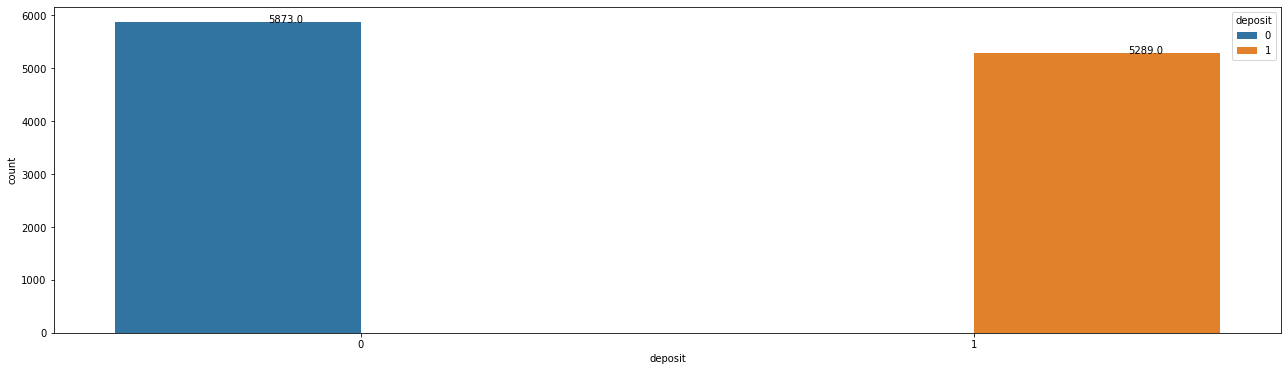

In [49]:
# influence of categorical columns  on response variable 
def categorical_columns(list_cats):
    for i in list_cats:
        plt.figure(figsize=(22,6))
        ax = sns.countplot(df[i],hue=df['deposit'])
    
        for p in ax.patches:
           ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))
    
        plt.show()
        
categorical_columns(list_cats)

In [50]:
# labelencoder
for icol in list_cats:
    df[icol] = labelencoder.fit_transform(df[icol])

In [51]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [52]:
# print the dataset after the labelencoder
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [53]:
# Alternatively X and y can be obtained directly from the dataframe attribute:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [54]:
# Shape - dataset
print(f"Shape X : {X.shape}")
print(f"Shape y : {y.shape}")

Shape X : (11162, 16)
Shape y : (11162,)


In [55]:
# split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [56]:
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [57]:
#definição do modelo (definir o total de camadas, quantos neurônios cada camada terá, as funções de 
#ativação e como as camadas se interconectam)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [58]:
#compilar o modelo (definir o algoritmo a computar os gradientes, as métricas capazes de avaliar erros 
#e a função de perda)
ann.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
#treinar o modelo
sgd = ann.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
297/297 [==============================] - 1s 1ms/step - loss: 6.1562 - accuracy: 0.5208
Epoch 2/20
297/297 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5240
Epoch 3/20
297/297 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5240
Epoch 4/20
297/297 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5240
Epoch 5/20
297/297 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5240
Epoch 6/20
297/297 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5240
Epoch 7/20
297/297 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5240
Epoch 8/20
297/297 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.5239
Epoch 9/20
297/297 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5240
Epoch 10/20
297/297 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5240

In [60]:
# evaluate the model
loss_sgd, acc_sgd = ann.evaluate(x_test, y_test, verbose=2)

loss_sgd, acc_sgd

53/53 - 0s - loss: 0.6854 - accuracy: 0.5385 - 119ms/epoch - 2ms/step


(0.6854187846183777, 0.5385074615478516)